In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [44]:
# Importing functions from the above library
warnings.filterwarnings('ignore')
from sklearn.metrics import pairwise_distances #Calculating Cosine Similarity between Users
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
#from scipy.spatial.distance import cosine, correlation

In [3]:
# Upload dataset - anime.csv
#Reading our dataset
df = pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
# Check for the unique values in episodes as it is of object data type whereas it should be of numeric
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [6]:
# converting the data type of episodes
# replace({'Unknown': np.nan}) helps replace the string 'unknown' with Nan values. This helps to perforn furthur analysis
# astype(float) is used to convert the data type to numeric for furthur computation
df['episodes'] = df['episodes'].replace({'Unknown': np.nan}).astype(float)

In [7]:
df.describe()

,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [8]:
df.nunique() # checking unique values

,0
anime_id,12294
name,12292
genre,3264
type,6
episodes,186
rating,598
members,6706


In [9]:
# Columns in the dataset
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

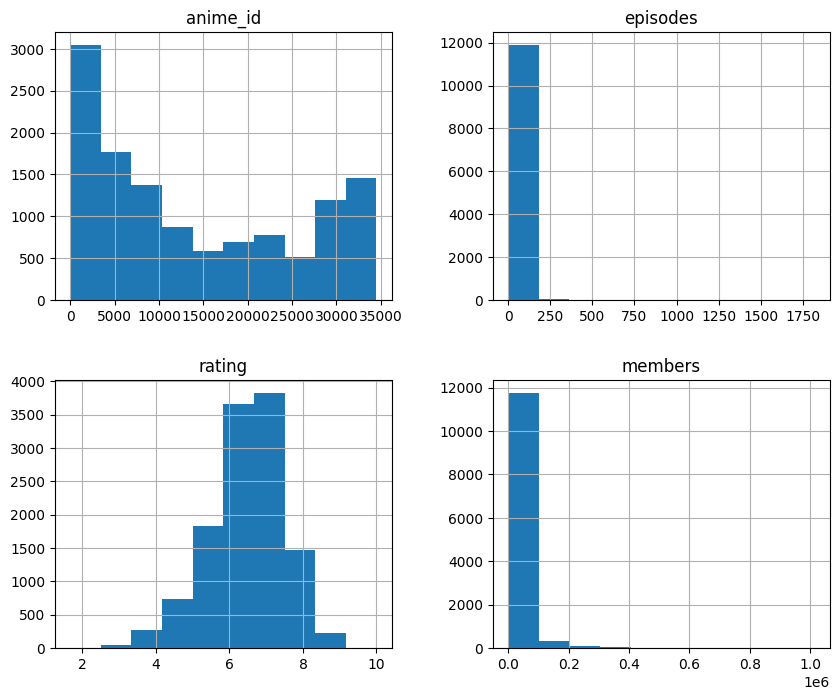

In [10]:
# Visualizing the data
df.hist(figsize=(10,8))
plt.show()

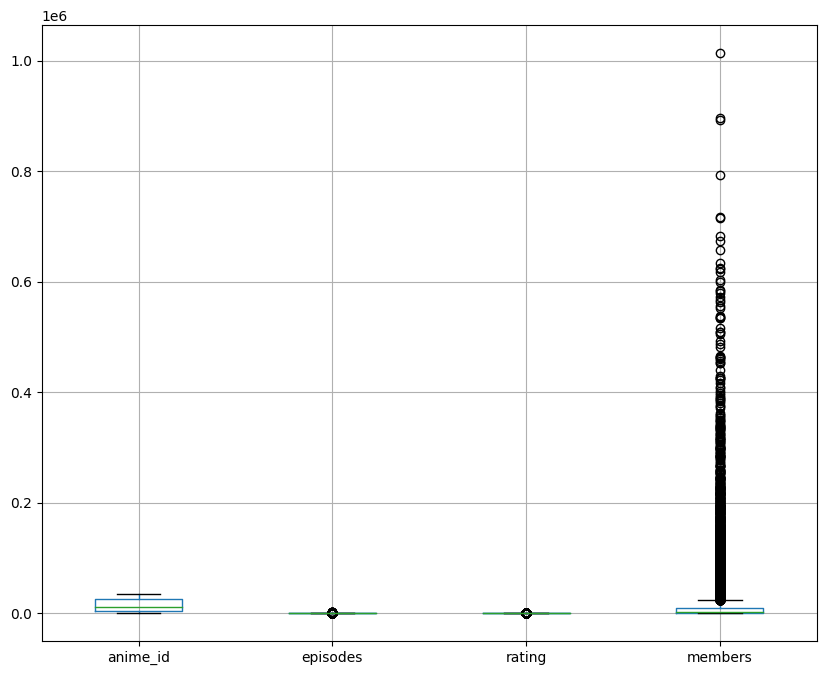

In [11]:
# Checking for outliers
df.boxplot(figsize=(10,8))
plt.show()

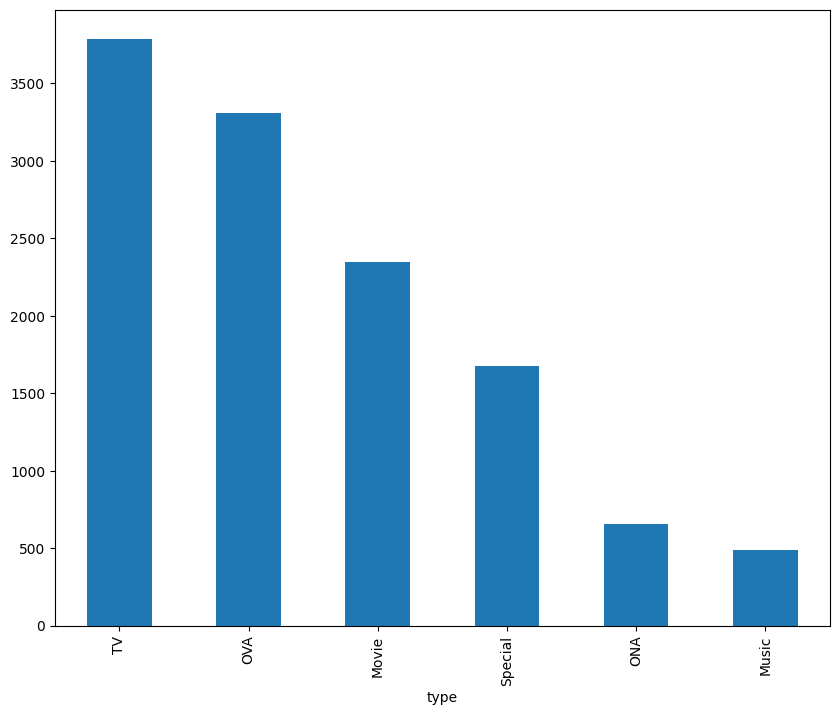

In [12]:
# Visualizing the count of number of types
df['type'].value_counts().plot(kind='bar', figsize=(10,8))
plt.show()

# **01. Data Preprocessing**

In [13]:
# Checking for missing values
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,340
rating,230
members,0


In [14]:
# Checking for Null values
df[df['type'].isna()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,NaN,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,NaN,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,NaN,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,NaN,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,NaN,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,NaN,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,NaN,NaN,4017
10983,34332,Flying Babies,NaN,NaN,NaN,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,NaN,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,NaN,NaN,11


In [15]:
# Deleting the records that dont provide much information as
# All the records with type as null, have episodes and rating as null as well
df.dropna(subset=['type'], inplace=True)
df.isna().sum()

,0
anime_id,0
name,0
genre,59
type,0
episodes,315
rating,205
members,0


In [16]:
# viewing records with movie  type
df[df['type'] == 'Movie']

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1.0,9.10,72534
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1.0,9.05,102733
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1.0,8.93,466254
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1.0,8.84,226193
...,...,...,...,...,...,...,...
11738,3038,Senya Ichiya Monogatari,"Fantasy, Hentai",Movie,1.0,6.18,1394
11805,2755,Cleopatra,"Hentai, Historical",Movie,1.0,6.06,1709
12244,11141,Blue Seagull,"Action, Hentai",Movie,1.0,4.60,337
12258,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1.0,1.92,129


In [17]:
df[df['type'] == 'Movie'].isnull().sum()

,0
anime_id,0
name,0
genre,42
type,0
episodes,4
rating,51
members,0


In [18]:
# Performing imputation
# For movies type filling the episodes column with 1
df.loc[df['type'] == 'Movie', 'episodes'] = 1

In [19]:
df[df['type'] == 'Movie'].isnull().sum()

,0
anime_id,0
name,0
genre,42
type,0
episodes,0
rating,51
members,0


In [20]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,59
type,0
episodes,311
rating,205
members,0


In [21]:
# Filling the null values in genre to unknown
df['genre'] = df['genre'].fillna('Unknown')

In [22]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,311
rating,205
members,0


In [23]:
# Filling the null values in rating with 0
df['rating'] = df['rating'].fillna(0)

In [24]:
# For anime types other than 'Movie', fill missing 'episodes' values with the mean of episodes grouped by 'type'
df.loc[df['type'] != 'Movie', 'episodes'] = df.loc[df['type'] != 'Movie'].groupby('type')['episodes'].transform(lambda x: x.fillna(x.mean()))

In [25]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


# **02. Feature Extraction**

In [26]:
# Performing one hot encoding and splitting up no. of genre
df1 = df['genre'].str.get_dummies(sep=', ') # As some animes have multiple genres, splitting them up and converting them into a variable
df1

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
new_df1 = pd.concat([df, df1], axis=1, join='inner')
new_df1

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,Under World,Hentai,OVA,1.0,4.28,183,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
new_df1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [29]:
# Dropping the genre column
new_df1.drop(columns=['genre'], inplace=True)

In [30]:
# Standardizing the rating and member columns as they have very large scale differences
scaler = StandardScaler()
new_df1[['rating', 'members']] = scaler.fit_transform(new_df1[['rating', 'members']])
new_df1

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.0,2.287349,3.326766,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.203598,14.135032,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,2.195985,1.752679,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,2.135075,11.946296,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9969,Gintama&#039;,TV,51.0,2.127462,2.427090,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1.0,-1.686982,-0.325939,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,Under World,OVA,1.0,-1.588005,-0.326449,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,Violence Gekiga David no Hoshi,OVA,4.0,-1.131185,-0.325793,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1.0,-1.055048,-0.326595,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# finding anime with rating more than 2
new_df1[new_df1['rating'] >= 2]

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.000000,2.287349,3.326766,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.000000,2.203598,14.135032,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.000000,2.195985,1.752679,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.000000,2.135075,11.946296,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9969,Gintama&#039;,TV,51.000000,2.127462,2.427090,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,TV,10.000000,2.119848,1.371569,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,11061,Hunter x Hunter (2011),TV,148.000000,2.104621,7.431569,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,820,Ginga Eiyuu Densetsu,OVA,110.000000,2.089393,1.140618,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Movie,1.000000,2.081780,0.992172,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,15417,Gintama&#039;: Enchousen,TV,13.000000,2.089393,1.148455,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **03. Model Building**

In [41]:
# Defining a recommendation function
# function recommends anime that are similar to a given target_anime
def recommend_similar_anime(df, target_anime, threshold=0.5): # Inputs - dataframe with the anime, target anime, threshold of cosine similarity
    # Extract features for similarity computation
    features = df.drop(['name', 'type'], axis=1) # name is the unique identifier and doesn't contribute to similarity calculations

    # Find the target anime's features
    target_row = features[df['name'] == target_anime] # checks and assigns features of row matching target anime

    if target_row.empty:
        return f"Anime '{target_anime}' not found in the dataset."

    similarities = cosine_similarity(target_row, features).flatten() #computes cosine similarity & flattens it to give a similarity of 1D array
    #get index of similar anime, whose similarities are greater than the threshold, leaving the target anime
    similar_indices = np.where((similarities > threshold) & (df['name'] != target_anime))[0]

    recommended_anime = df.iloc[similar_indices]['name'].tolist() #return list of recommended animes

    return recommended_anime

In [34]:
# Giving a target anime and checking for recommendations
recommendations = recommend_similar_anime(new_df1, 'Naruto', threshold=0.5) # Calling the recommendation function by giving the target variable and required inputs
recommendations_series = pd.Series(recommendations) # Converting the resulting recommendations into a series to perform pandas functions
top_5_recommendations = recommendations_series.value_counts().head(5) # Selecting only the top 5 recommendations with maximum occurance
print(top_5_recommendations) # displaying the recommendations

Cowboy Bebop                  1
Trinity Blood                 1
Turn A Gundam                 1
Hungry Heart: Wild Striker    1
Chuuka Ichiban!               1
Name: count, dtype: int64


In [39]:
# Giving a target anime and checking for recommendations
recommendations = recommend_similar_anime(new_df1, 'Gintama', threshold=0.5) # Calling the recommendation function by giving the target variable and required inputs
recommendations_series = pd.Series(recommendations) # Converting the resulting recommendations into a series to perform pandas functions
top_5_recommendations = recommendations_series.value_counts().head(5) # Selecting only the top 5 recommendations with maximum occurance
print(top_5_recommendations) # displaying the recommendations

Saru Kani Gassen           2
Shi Wan Ge Leng Xiaohua    2
Kimi no Na wa.             1
Azumi Mamma★Mia            1
Aterui                     1
Name: count, dtype: int64


In [42]:
# Increasing the threshold value and checking recommendations
recommendations = recommend_similar_anime(new_df1, 'Naruto', threshold=0.8) # Calling the recommendation function by giving the target variable and required inputs
recommendations_series = pd.Series(recommendations) # Converting the resulting recommendations into a series to perform pandas functions
top_5_recommendations = recommendations_series.value_counts().head(5) # Selecting only the top 5 recommendations with maximum occurance
print(top_5_recommendations) # displaying the recommendations

Cowboy Bebop                               1
Monster                                    1
One Piece                                  1
Rurouni Kenshin: Meiji Kenkaku Romantan    1
Trigun                                     1
Name: count, dtype: int64


In [43]:
# Increasing the threshold value and checking recommendations
recommendations = recommend_similar_anime(new_df1, 'Gintama', threshold=0.8) # Calling the recommendation function by giving the target variable and required inputs
recommendations_series = pd.Series(recommendations) # Converting the resulting recommendations into a series to perform pandas functions
top_5_recommendations = recommendations_series.value_counts().head(5) # Selecting only the top 5 recommendations with maximum occurance
print(top_5_recommendations) # displaying the recommendations

Saru Kani Gassen                 2
Shi Wan Ge Leng Xiaohua          2
Kimi no Na wa.                   1
au x Rope                        1
Aura Battler Dunbine Memorial    1
Name: count, dtype: int64


# **04. Evaluation**

In [45]:
# Creating a new column liked, where if the rating is >= 1, the member must have liked the anime
new_df1['liked'] = ((new_df1['rating'] >= 1)).astype(int)
print(new_df1['liked'].value_counts())
# This is done to create a binary classification model to be evaluated

liked
0    11044
1     1225
Name: count, dtype: int64


In [46]:
# Dividing the dataset into independant variable and target variable
X = new_df1.drop(['name', 'type','anime_id'], axis=1)
y = new_df1['liked']  # Target variable

In [47]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Initializing the logistic regression model as its a binary classification dataset
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Understanding the shapes of all the divided datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9815, 48)
Shape of X_test: (2454, 48)
Shape of y_train: (9815,)
Shape of y_test: (2454,)


In [50]:
# Predicting on the testing dataset
y_pred = model.predict(X_test)

In [51]:
# Finding out accurarcy, recall, precision and F1 score
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Prinring the values
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Q1.Can you explain the difference between user-based and item-based collaborative filtering?

User-based and item-based collaborative filtering are two common approaches used in recommendation systems to predict a user's interest in an item (like a product, movie, or song) based on past behavior.

Both methods utilize the concept of finding similarities but differ in how they do it.

1. User-Based Collaborative Filtering:
User-based collaborative filtering (UBCF) focuses on finding similarities between users.
The basic idea is that if two users have similar preferences or have rated items in a similar way in the past, then the items that one user likes can be recommended to the other user.

2. Item-Based Collaborative Filtering:
Item-based collaborative filtering (IBCF) focuses on finding similarities between items instead of users.
The idea here is that if two items are similar (i.e., users rate them similarly), then a user who has liked or interacted with one item is likely to like the other.

Q2. What is collaborative filtering, and how does it work?

Collaborative filtering is a technique used in recommendation systems to predict the preferences of a user by collecting preferences from multiple users.

The assumption is that users who have agreed in the past will agree in the future or that a user will prefer items similar to what they liked in the past.

Collaborative filtering works by creating a user-item matrix where each row represents a user and each column represents an item.

The values in this matrix are usually ratings or interaction scores.

The system finds patterns within this matrix to predict user preferences for items they haven't interacted with yet.

This can be done using either user-based or item-based methods, as explained above.